# Handwritten Digit Recognition
- Dataset = MNIST
- Frameworks = PyTorch


### Necessary Imports

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [2]:
import os
from google.colab import drive

### Download The Dataset & Define The Transforms

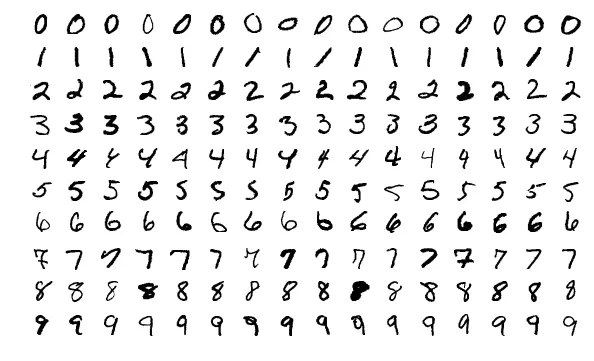

In [3]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.03MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.2MB/s]


### Exploring The Data

In [5]:
dataiter = iter(trainloader)
images, labels = next(iter(trainloader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


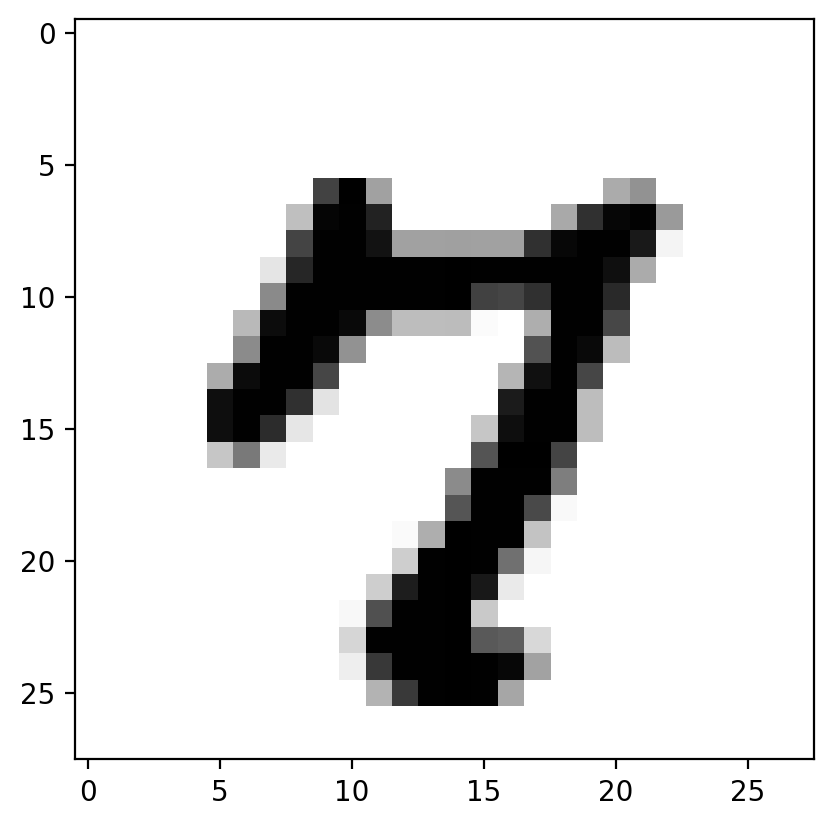

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

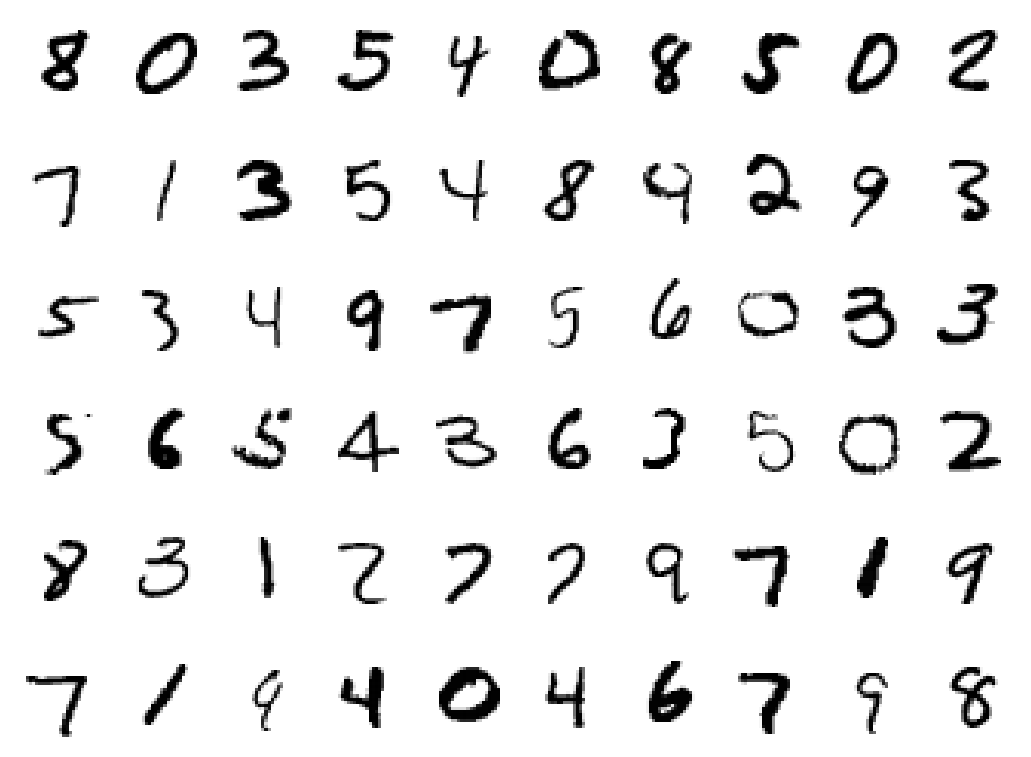

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [8]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [10]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-3.0916e-04, -3.0916e-04, -3.0916e-04,  ..., -3.0916e-04,
         -3.0916e-04, -3.0916e-04],
        [-1.2424e-03, -1.2424e-03, -1.2424e-03,  ..., -1.2424e-03,
         -1.2424e-03, -1.2424e-03],
        [ 1.8292e-03,  1.8292e-03,  1.8292e-03,  ...,  1.8292e-03,
          1.8292e-03,  1.8292e-03],
        ...,
        [ 3.3431e-05,  3.3431e-05,  3.3431e-05,  ...,  3.3431e-05,
          3.3431e-05,  3.3431e-05],
        [ 7.6053e-04,  7.6053e-04,  7.6053e-04,  ...,  7.6053e-04,
          7.6053e-04,  7.6053e-04],
        [-9.1939e-05, -9.1939e-05, -9.1939e-05,  ..., -9.1939e-05,
         -9.1939e-05, -9.1939e-05]])


In [11]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [12]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0194, -0.0286, -0.0324,  ...,  0.0304, -0.0066,  0.0180],
        [ 0.0314,  0.0005, -0.0130,  ...,  0.0166, -0.0232,  0.0093],
        [ 0.0121, -0.0290,  0.0336,  ..., -0.0116, -0.0046, -0.0032],
        ...,
        [ 0.0033,  0.0137, -0.0252,  ...,  0.0031,  0.0004, -0.0278],
        [-0.0070, -0.0125,  0.0218,  ...,  0.0069,  0.0206,  0.0072],
        [-0.0055, -0.0273,  0.0097,  ...,  0.0347,  0.0099, -0.0267]],
       requires_grad=True)
Gradient - tensor([[ 1.8980e-04,  1.8980e-04,  1.8980e-04,  ...,  1.8980e-04,
          1.8980e-04,  1.8980e-04],
        [-4.4358e-04, -4.4358e-04, -4.4358e-04,  ..., -4.4358e-04,
         -4.4358e-04, -4.4358e-04],
        [ 3.3730e-03,  3.3730e-03,  3.3730e-03,  ...,  3.3730e-03,
          3.3730e-03,  3.3730e-03],
        ...,
        [ 7.2104e-05,  7.2104e-05,  7.2104e-05,  ...,  7.2104e-05,
          7.2104e-05,  7.2104e-05],
        [-1.8421e-04, -1.8421e-04, -1.8421e-04,  ..., -1.8421e

In [13]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0194, -0.0286, -0.0324,  ...,  0.0304, -0.0066,  0.0180],
        [ 0.0314,  0.0005, -0.0130,  ...,  0.0166, -0.0232,  0.0093],
        [ 0.0121, -0.0291,  0.0336,  ..., -0.0117, -0.0046, -0.0033],
        ...,
        [ 0.0033,  0.0137, -0.0252,  ...,  0.0031,  0.0004, -0.0278],
        [-0.0070, -0.0125,  0.0218,  ...,  0.0069,  0.0206,  0.0072],
        [-0.0055, -0.0273,  0.0097,  ...,  0.0347,  0.0099, -0.0267]],
       requires_grad=True)


### Core Training Of Neural Network

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6372611195103192
Epoch 1 - Training loss: 0.28338483146735344
Epoch 2 - Training loss: 0.2169896914546233
Epoch 3 - Training loss: 0.17202012044296208
Epoch 4 - Training loss: 0.14176877070742566


In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))